# STAT207 Mini-Project #1 - Nba Regular Season Stats 2022-2023


Om Patel (opate22)

In [1]:
#Imports here
import pandas as pd     # imports pandas and calls the imported version 'pd'
import numpy as np
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

## 1. Introduction

## Motivation
Basketball is a fast-paced sport where professional players vary based on their position, impacting key scoring performances and play-making decisions during games. Understanding the relationship between player positions and points impacts the assists per game is essential for coaches, teams, analysts, and general managers who want to build a balanced roster of players. A coach or team can use this information to revise their play-making styles, ball movement, lineups, and rotation and to see if any key rational players on either lineup (starting or bench)  can have high-scoring games while passing the ball around. This insight can help teams develop strategic plans, optimize the player's roles and potential, or even identify weaknesses in their squad for potential cuts or trade ideas. By analyzing these patterns, NBA players and teams can better understand how different positions contribute to offense production in the NBA.

# Research Question: How does the nature of the relationship between Assists per game and Points per game change for different player positions in the dataset?



## 2. Dataset Discussion

I got this CSV file from Kaggle. I searched the NBA stats dataset and found "NBA Player Stats Dataset for the 2022-2023" by Bryan Weather Chung. I downloaded the CSV file on February 17, 2025. Bryan Weather Chung got this dataset from https://www.basketball-reference.com/leagues/NBA_2023_per_game.html. This dataset has the most data types in the observation; the only missing ones are boolean values. This impacts whether a player is a starter or a bench player because there are no specific distinctions if a player is a starter or not. I intend to explore points per game (PTS), assists per game (AST), and the position a player plays (Pos).
The column name abbreviations are listed as follows:
Rk: Rank
Player: Player's name
Pos: Position
Age: The player's age
Tm: Team
G: Games played
GS: Games started
MP: Minutes played per game
FG: Field goals per game
FGA: Field goal attempts per game
FG%: Field goal percentage
3P: 3-point field goals per game
3PA: 3-point field goal attempts per game
3P%: 3-point field goal percentage
2P: 2-point field goals per game
2PA: 2-point field goal attempts per game
2P%: 2-point field goal percentage
eFG%: Effective field goal percentage
FT: Free throws per game
FTA: Free throw attempts per game
FT%: Free throw percentage
ORB: Offensive rebounds per game
DRB: Defensive rebounds per game
TRB: Total rebounds per game
AST: Assists per game
STL: Steals per game
BLK: Blocks per game
TOV: Turnovers per game
PF: Personal fouls per game
PTS: Points per game
https://www.kaggle.com/datasets/bryanchungweather/nba-players-data-2022-2023?select=nba_2022_2023.csv 



In [2]:
nba_df = pd.read_csv('nba_2022_2023.csv')
nba_df.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [3]:
nba_df.shape[0]

679

## 3. Dataset Cleaning

## Drop SG-PG etc players because not represented properly

# Checking for Inplicit and Explicit Missing Values

In [4]:
nba_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
nba_df.isna().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%       24
2P         0
2PA        0
2P%        7
eFG%       3
FT         0
FTA        0
FT%       37
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [6]:
nba_df2 = nba_df.fillna(0)
nba_df2

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [7]:
nba_df2.isna().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [8]:
nba_df2.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [9]:
np.unique(nba_df2[['Player' , 'Pos' , 'Tm']].values)

array(['A.J. Green', 'A.J. Lawson', 'AJ Griffin', 'ATL', 'Aaron Gordon',
       'Aaron Holiday', 'Aaron Nesmith', 'Aaron Wiggins',
       'Admiral Schofield', 'Al Horford', 'Alec Burks',
       'Aleksej Pokusevski', 'Alex Caruso', 'Alex Len', 'Alize Johnson',
       'Alondes Williams', 'Alperen Şengün', 'Amir Coffey',
       'Andre Drummond', 'Andre Iguodala', 'Andrew Nembhard',
       'Andrew Wiggins', 'Anfernee Simons', 'Anthony Davis',
       'Anthony Edwards', 'Anthony Gill', 'Anthony Lamb', 'Austin Reaves',
       'Austin Rivers', 'Ayo Dosunmu', 'BOS', 'BRK', 'Bam Adebayo',
       'Ben Simmons', 'Bennedict Mathurin', 'Bismack Biyombo',
       'Blake Griffin', 'Blake Wesley', 'Boban Marjanović',
       'Bobby Portis', 'Bogdan Bogdanović', 'Bojan Bogdanović', 'Bol Bol',
       'Bones Hyland', 'Bradley Beal', 'Brandon Boston Jr.',
       'Brandon Clarke', 'Brandon Ingram', 'Braxton Key', 'Brook Lopez',
       'Bruce Brown', 'Bruno Fernando', 'Bryce McGowens', 'Bryn Forbes',
       'B

In [10]:
np.unique(nba_df2[['AST','PTS' ]].values)
#	'STL',	'BLK',	'TOV',	'PF',	
#'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%','2P', '2PA', '2P%', 'eFG%', 'FT','FTA', 'FT%', 'ORB',	'DRB',	'TRB',

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.7, 13.8, 13.9, 14. , 14.1, 14.3, 14.4, 14.5,
       14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15

In [11]:
main_positions = ['PG', 'SG', 'SF', 'PF', 'C']
nba_df2 = nba_df2[nba_df2['Pos'].isin(main_positions)]

# Visualizations of the 3 Variables

## Research Question
How does the nature of the relationship between Assists per game and Points per game change for different player positions in the dataset?

# Single Categorical (z)

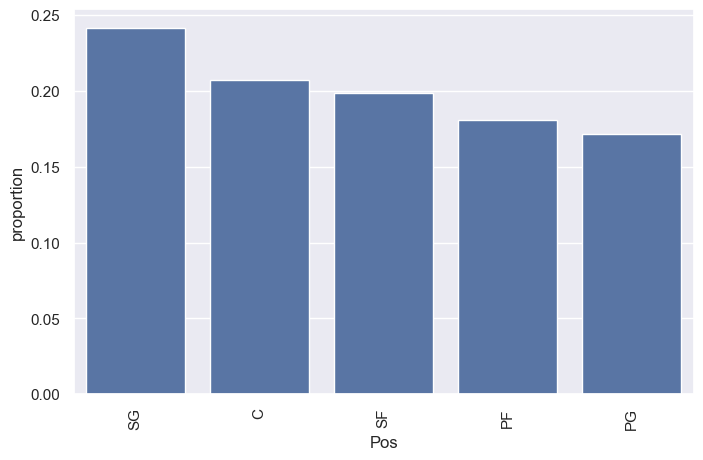

In [12]:
position_percentage = nba_df2['Pos'].value_counts(normalize=True)
position_percentage

# single categorical value position(z)
plt.figure(figsize = (8,5))
sns.barplot(x = position_percentage.index, y = position_percentage)
plt.xticks(rotation = 90)
plt.show()

# Single Numerical (y)

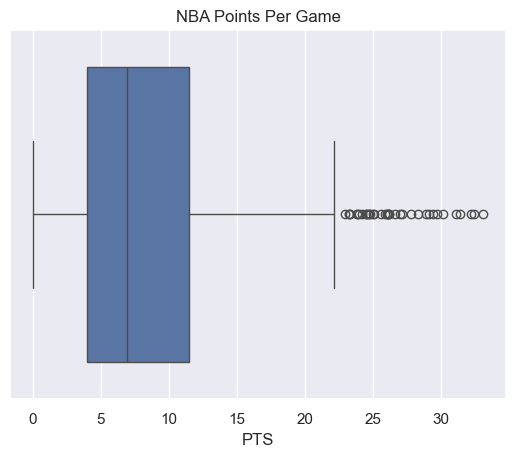

In [13]:
# single numerical value for points per game (y)
sns.boxplot(x = nba_df2['PTS'])
plt.title('NBA Points Per Game')
plt.show()

In [14]:
Q3 = nba_df2['PTS'].quantile(0.75)
Q1 = nba_df2['PTS'].quantile(0.25)

IQR = Q3-Q1
IQR

np.float64(7.475)

<Axes: >

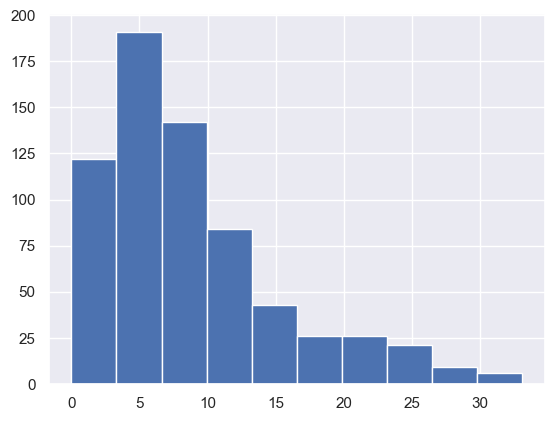

In [15]:
nba_df2['PTS'].hist()
# skewed to the right

In [16]:
median_points_per_game = nba_df2['PTS'].mean()
median_points_per_game

np.float64(8.828358208955224)

In [17]:
nba_df2['PTS'].describe()

count    670.000000
mean       8.828358
std        6.609171
min        0.000000
25%        4.025000
50%        6.950000
75%       11.500000
max       33.100000
Name: PTS, dtype: float64

# Single Numerical (x)

<Axes: >

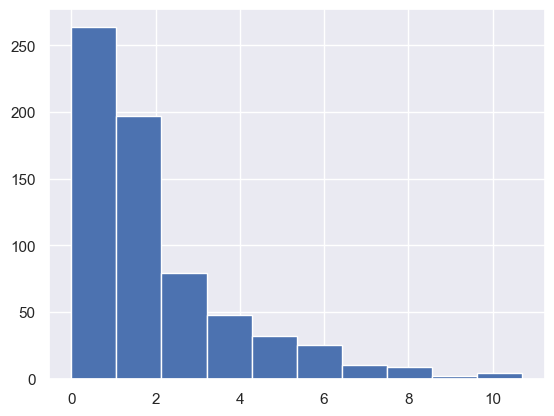

In [18]:
nba_df2['AST'].hist()
# skewed to the right

In [19]:
median_points_per_game = nba_df2['AST'].mean()
median_points_per_game

np.float64(2.0028358208955224)

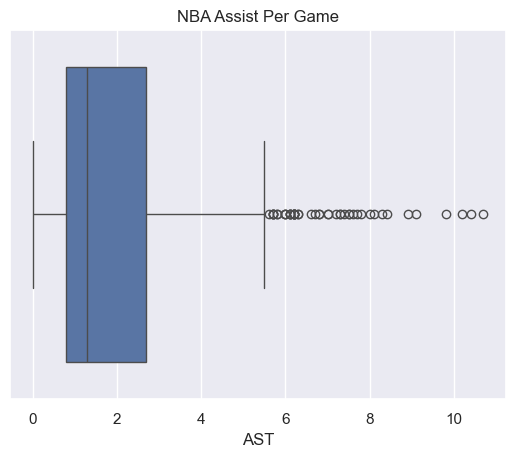

In [20]:
# single numerical value for assisits per game (x)
sns.boxplot(x = nba_df2['AST'])
plt.title('NBA Assist Per Game')
plt.show()

In [21]:
Q3 = nba_df2['AST'].quantile(0.75)
Q1 = nba_df2['AST'].quantile(0.25)

IQR = Q3-Q1
IQR

np.float64(1.9000000000000001)

In [22]:
nba_df2['AST'].describe()

count    670.000000
mean       2.002836
std        1.888049
min        0.000000
25%        0.800000
50%        1.300000
75%        2.700000
max       10.700000
Name: AST, dtype: float64

# Double Numerical (x and y)

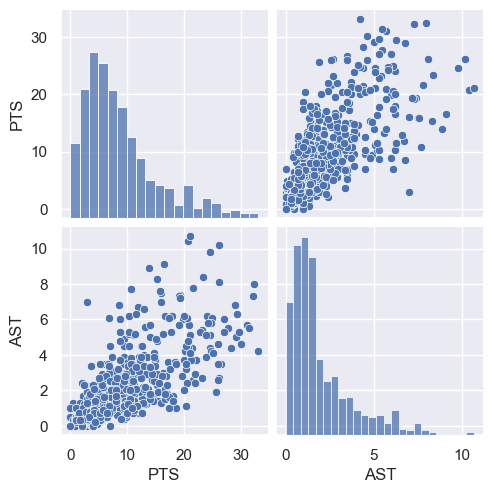

In [23]:
# double numerical (x and y)
sns.pairplot(nba_df2[['PTS','AST']])
plt.show()

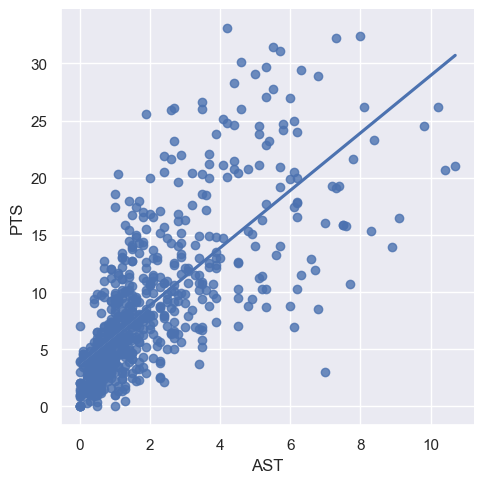

In [24]:
sns.lmplot(x = 'AST', y = 'PTS', data = nba_df2, ci = False)
plt.show()

In [25]:
nba_df2[['AST','PTS']].corr()

,AST,PTS
AST,1.000000,0.718421
PTS,0.718421,1.000000


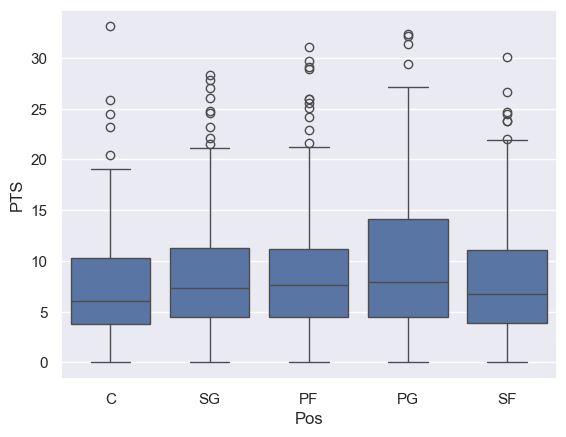

In [26]:
# x and z
sns.boxplot(x = nba_df2['Pos'], y = nba_df2['PTS'], data = nba_df2)
plt.show()

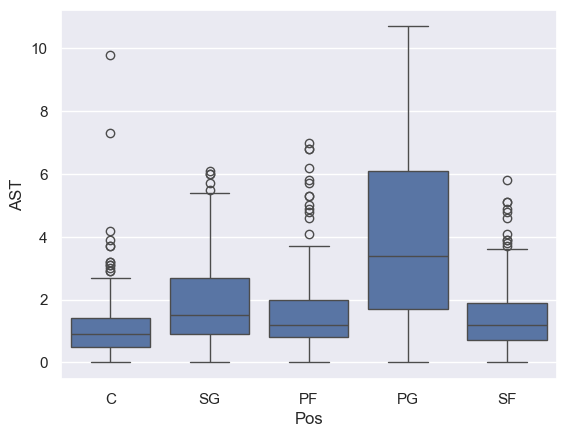

In [27]:
# y and z
sns.boxplot(x = nba_df2['Pos'], y = nba_df2['AST'], data = nba_df2)
plt.show()

My dataset has explicit missing values. Some of the rows are empty, which Python converts to NaN values. After using the isna().sum() on nba_df, I was presented with 3 FG%, 24 3P%, 7 2P%, 3 eFG%, and 37 FT%. I decided to fill these NaN values with zero because not all players get the chance to shoot or make baskets because of their skill level. Filling the missing values with the means of the columns would also misrepresent those specific players by messing up their stat lines even though they might not be producing at that benchmark yet. Dropping the missing values will not accurately represent our research questions because some players do represent 0 in certain categories, even though we want to explore the nature of the relationship between Assists per game and Points per game change for different player positions in the dataset. It is okay that some players' stat lines are represented as 0. I created a new data frame called nba_df2, which will store all the missing values with 0 using the .fillna(0).

I then verified with Python, converted all the missing values to 0, and checked if each column's datatype matched correctly. This includes all of the integers (int) being correct, decimals (floats), and objects (in this case, strings) are also accurate. After filling the missing values with 0, I started to check for any implicit missing values in this dataset. I checked this using the numpy unique (np.unique) and the .values to display all the values in the array. I first took all the object's data types and used np. unique for all the respected columns with that data type. I made sure that none of the strings were implicit. I did the same thing for the numerical data types (integers (int) and decimals (floats)). I used the same code, and the output I got was that all the data types matched what the column name was supposed to represent. This dataset does not have any implicit missing values. 

Additionally, I decided to remove hybrid positions and mainly focus on the central positions of the game because the hybrid positions did not have enough data and were causing skewness and unstable correlation due to the lack of data points. Since my research question focuses on how AST and PTS vary across positional players, including the central five primary positions makes more sense.

Finally, I kept the outliers in this analysis because they represent "elite" players who can score and pass the ball to other players. Removing them would remove key important insights into certain players' positions. Also, my research question and motivation for this project focus on the player's position, not if the player is elite or average, and that comparison to how the nature of the relationship between Assists per game and Points per game changes for different players' positions in the dataset.


## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

<Figure size 1400x800 with 0 Axes>

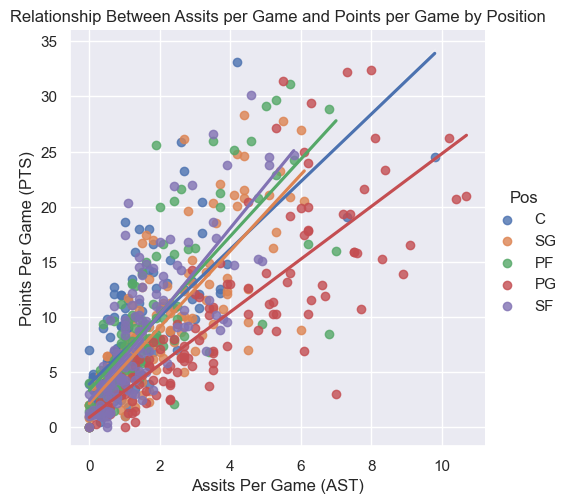

In [28]:
plt.figure(figsize = (14,8))
sns.lmplot(x = 'AST', y = 'PTS', hue ='Pos', ci=False, data = nba_df2)
plt.title('Relationship Between Assits per Game and Points per Game by Position')
plt.xlabel('Assits Per Game (AST)')
plt.ylabel('Points Per Game (PTS)')
plt.show()

In [29]:
nba_df2[["Pos","AST","PTS"]].groupby("Pos").corr()

AST       PTS
Pos                        
C   AST  1.000000  0.700103
    PTS  0.700103  1.000000
PF  AST  1.000000  0.770290
    PTS  0.770290  1.000000
PG  AST  1.000000  0.800443
    PTS  0.800443  1.000000
SF  AST  1.000000  0.772346
    PTS  0.772346  1.000000
SG  AST  1.000000  0.806029
    PTS  0.806029  1.000000

In [30]:
nba_df2[["Pos","AST","PTS"]].groupby("Pos").describe()

AST                                                  PTS             \
     count      mean       std  min  25%  50%  75%   max  count       mean   
Pos                                                                          
C    139.0  1.210072  1.267732  0.0  0.5  0.9  1.4   9.8  139.0   7.614388   
PF   121.0  1.731405  1.573215  0.0  0.8  1.2  2.0   7.0  121.0   9.400826   
PG   115.0  3.916522  2.595980  0.0  1.7  3.4  6.1  10.7  115.0  10.257391   
SF   133.0  1.512030  1.231040  0.0  0.7  1.2  1.9   5.8  133.0   8.336090   
SG   162.0  1.930247  1.468937  0.0  0.9  1.5  2.7   6.1  162.0   8.832099   

                                              
          std  min    25%   50%    75%   max  
Pos                                           
C    5.542413  0.0  3.750  6.10  10.25  33.1  
PF   7.131602  0.0  4.500  7.60  11.20  31.1  
PG   7.756108  0.0  4.450  7.90  14.15  32.4  
SF   6.227460  0.0  3.900  6.70  11.10  30.1  
SG   6.300820  0.0  4.525  7.35  11.25  28.3

In [31]:
nba_df2['Pos'].value_counts()

Pos
SG    162
C     139
SF    133
PF    121
PG    115
Name: count, dtype: int64

Based on the data, the relationship between assists per game and points per game differs significantly by the players' positions. According to the graph and the correlation matrix, shooting guards have the most substantial relationship between points and assists, showing that these players who play shooting guard tend to pass and score more, possibly because they are the primary offensive players who create shot opportunities for themselves and others (correlation at .8060). Point guards have a slightly lower correlation at .8004, which is interesting because this position of players is more of the playmaking type. However, point guards focus on distributing the ball for better opportunities rather than scoring themselves. Small forwards and power forwards show more of a moderate correlation(around .7702 - .7723) between pts and ast per game by position. This indicates that these two positions contribute to passing and scoring but are not as strongly correlated as guards. This makes sense because small and powerful forwards are everywhere around the court or near the basket for quick scoring, rebounding, or blocking/playmaking purposes. The weakest correlation is the center positions, which aligns with the fact that most centers in the league tend to focus more on scoring and rebounding rather than assisting other teammates.


## 5. Conclusion

The relationship between assists and points per game varies significantly by a player's position. This confirms that different positions have specialized roles that impact this relationship between the data of assists per game and points per game. While this analysis provides valuable insights into the positional relationships between points and assists, some limitations exist. The data does not include the context of playstyle metrics, how the players are used, offensive playmaking styles, and team quality, which can impact points and assist relationships. This dataset is only specific to the 2022-2023 year, and the game changes within the season, too, meaning the results may not generalize across current or future seasons; trades, player usage, age, and coaching strategies can all be changed. These shortcomings mean that while general team managers and coaches can use this analysis to understand the general postal trends and expectations, they should also combine this data with historical data tailored to a specific player and their positions for more precise decision-making purposes. Future research can improve by including multi-season data for more advanced metrics and accurate representation of the general position to optimize the most effective usage of that positional player. 


# My Report

Basketball is a fast-paced sport where professional players vary based on their position, impacting key scoring performances and playmaking decisions during games. Understanding the relationship between player positions and points impacts the assists per game is essential for coaches, teams, analysts, and general managers who want to build a balanced roster of players. A coach or team can use this information to revise their playmaking styles, ball movement, lineups, and rotation and to see if any key rational players on either lineup (starting or bench)  can have high-scoring games while passing the ball around. This insight can help teams develop strategic plans, optimize the player's roles and potential, or even identify weaknesses in their squad for potential cuts or trade ideas. By analyzing these patterns, NBA players and teams can better understand how different positions contribute to offense production in the NBA.

# Research Question: How does the nature of the relationship between Assists per game and Points per game change for different player positions in the dataset?

I got this CSV file from Kaggle. I searched the NBA stats dataset and found "NBA Player Stats Dataset for the 2022-2023" by Bryan Weather Chung. I downloaded the CSV file on February 17, 2025. Bryan Weather Chung got this dataset from https://www.basketball-reference.com/leagues/NBA_2023_per_game.html. This dataset has the most data types in the observation; the only missing ones are boolean values. This impacts whether a player is a starter or a bench player because there are no specific distinctions if a player is a starter or not. I intend to explore points per game (PTS), assists per game (AST), and the position a player plays (Pos).
The column name abbreviations are listed as follows:
Rk: Rank
Player: Player's name
Pos: Position
Age: The player's age
Tm: Team
G: Games played
GS: Games started
MP: Minutes played per game
FG: Field goals per game
FGA: Field goal attempts per game
FG%: Field goal percentage
3P: 3-point field goals per game
3PA: 3-point field goal attempts per game
3P%: 3-point field goal percentage
2P: 2-point field goals per game
2PA: 2-point field goal attempts per game
2P%: 2-point field goal percentage
eFG%: Effective field goal percentage
FT: Free throws per game
FTA: Free throw attempts per game
FT%: Free throw percentage
ORB: Offensive rebounds per game
DRB: Defensive rebounds per game
TRB: Total rebounds per game
AST: Assists per game
STL: Steals per game
BLK: Blocks per game
TOV: Turnovers per game
PF: Personal fouls per game
PTS: Points per game
https://www.kaggle.com/datasets/bryanchungweather/nba-players-data-2022-2023?select=nba_2022_2023.csv 

My dataset has explicit missing values. Some of the rows are empty, which Python converts to NaN values. After using the isna().sum() on nba_df, I was presented with 3 FG%, 24 3P%, 7 2P%, 3 eFG%, and 37 FT%. I decided to fill these NaN values with zero because not all players get the chance to shoot or make baskets because of their skill level. Filling the missing values with the means of the columns would also misrepresent those specific players by messing up their stat lines even though they might not be producing at that benchmark yet. Dropping the missing values will not accurately represent our research questions because some players do represent 0 in certain categories, even though we want to explore the nature of the relationship between Assists per game and Points per game change for different player positions in the dataset. It is okay that some players' stat lines are represented as 0. I created a new data frame called nba_df2, which will store all the missing values with 0 using the .fillna(0).

I then verified with Python, converted all the missing values to 0, and checked if each column's datatype matched correctly. This includes all of the integers (int) being correct, decimals (floats), and objects (in this case, strings) are also accurate. After filling the missing values with 0, I started to check for any implicit missing values in this dataset. I checked this using the numpy unique (np.unique) and the .values to display all the values in the array. I first took all the object's data types and used np. unique for all the respected columns with that data type. I made sure that none of the strings were implicit. I did the same thing for the numerical data types (integers (int) and decimals (floats)). I used the same code, and the output I got was that all the data types matched what the column name was supposed to represent. This dataset does not have any implicit missing values. 

Additionally, I decided to remove hybrid positions and mainly focus on the central positions of the game because the hybrid positions did not have enough data and were causing skewness and unstable correlation due to the lack of data points. Since my research question focuses on how AST and PTS vary across positional players, including the central five primary positions makes more sense.

Finally, I kept the outliers in this analysis because they represent "elite" players who can score and pass the ball to other players. Removing them would remove key important insights into certain players' positions. Also, my research question and motivation for this project focus on the player's position, not if the player is elite or average, and that comparison to how the nature of the relationship between Assists per game and Points per game changes for different players' positions in the dataset.

Based on the data, the relationship between assists per game and points per game differs significantly by the players' positions. According to the graph and the correlation matrix, shooting guards have the most substantial relationship between points and assists, showing that these players who play shooting guard tend to pass and score more, possibly because they are the primary offensive players who create shot opportunities for themselves and others (correlation at .8060). Point guards have a slightly lower correlation at .8004, which is interesting because this position of players is more of the playmaking type. However, point guards focus on distributing the ball for better opportunities rather than scoring themselves. Small forwards and power forwards show more of a moderate correlation(around .7702 - .7723) between pts and ast per game by position. This indicates that these two positions contribute to passing and scoring but are not as strongly correlated as guards. This makes sense because small and powerful forwards are everywhere around the court or near the basket for quick scoring, rebounding, or blocking/playmaking purposes. The weakest correlation is the center positions, which aligns with the fact that most centers in the league tend to focus more on scoring and rebounding than assisting other teammates.

In conclusion,the relationship between assists and points per game varies significantly by a player's position. This confirms that different positions have specialized roles that impact this relationship between the data of assists per game and points per game. While this analysis provides valuable insights into the positional relationships between points and assists, some limitations exist. The data does not include the context of playstyle metrics, how the players are used, offensive playmaking styles, and team quality, which can impact points and assist relationships. This dataset is only specific to the 2022-2023 year, and the game changes within the season, too, meaning the results may not generalize across current or future seasons; trades, player usage, age, and coaching strategies can all be changed. These shortcomings mean that while general team managers and coaches can use this analysis to understand the general postal trends and expectations, they should also combine this data with historical data tailored to a specific player and their positions for more precise decision-making purposes. Future research can improve by including multi-season data for more advanced metrics and accurate representation of the general position to optimize the most effective usage of that positional player. 